In [ ]:
# @title HW 1
# @markdown Student Info
# @markdown Name: [Skyler Thomas]
# @markdown JHED-ID: [sthom215]

# @markdown Load up the calcium image video in the file: TEST MOVIE 00001-small-motion.tif. This file represents the raw fluorescence video in TIF format, common for calcium imaging.

import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
home = Path.cwd()

# Problem 2: Summary images. 

Load up the calcium image video in the file: $\texttt{TEST MOVIE 00001-small.tif}$. This file represents the raw fluorescence video in TIF format, but without the motion. One of the most common ways that people analyze functional data is to try to identify individual cells in the data in a “summary image”. A summary image condenses an entire video sequence into a single image, wherein each pixel represents a summary of the entire time-trace at the location of that pixel in the video.

## Part A 

Plot the “mean”, “median”, and “variance” images for the data provided. 

In [4]:
# @title check and load images. 
import tifffile

dir = os.listdir()
tiff1 = 'TEST_MOVIE_00001-small-motion.tif'

if tiff1 not in dir:
    if 'content' in str(Path.cwd().resolve()):
        print("On gogle colab, mounting drive")
        from google.colab import drive
        drive.mount('/content/drive')
        cwd = home /'drive/MyDrive/NSC_HW1'
        movie = tifffile.imread(cwd/tiff1)
    elif 'skyler' in str(Path.cwd().resolve()):
        print("On skyler's computer, looking for file in work directory")
        for path, dirs, files in os.walk(home.parent):
            cwd = Path(path)
            if tiff1 in files:
                movie = tifffile.imread(cwd/tiff1)
            else:
                continue
    else:
        print('file not found, please set home to the correct directory.')

else:
  movie = tifffile.imread(home/tiff1)

On skyler's computer, looking for file in work directory


In [27]:
# @title define functions
# Plot the “mean”, “median”, and “variance” images for the data provided. 
def get_mean(movie):
    """
    Get the mean image of the movie.
    Assuming the largest axis is the time axis.
    """
    axis = np.argmax(movie.shape)
    return np.mean(movie, axis)

def get_median(movie):
    """
    Get the median image of the movie.
    Assuming the largest axis is the time axis.
    """
    axis = np.argmax(movie.shape)
    return np.median(movie, axis)

def get_variance(movie):
    """
    Get the variance image of the movie.
    Assuming the largest axis is the time axis.
    """
    axis = np.argmax(movie.shape)
    return np.var(movie, axis)

def plot_mean_median_variance(movie):
    """
    Plot the mean, median, and variance images of the movie.
    Assuming the largest axis is the time axis.
    """
    
    fns = [get_mean, get_median, get_variance]
    imgs = [fn(movie) for fn in fns]

    fig, ax = plt.subplots(1, 3, figsize=(15,5), layout='tight')
    for ii, img in enumerate(imgs):
        title = f"{fns[ii].__name__.split('_')[-1]}"
        title = title.capitalize()
        ax[ii].imshow(img, cmap='gray')
        ax[ii].set_title(f"{title} Image")
        ax[ii].set_axis_off()
    fig.suptitle('Mean, Median, and Variance Images')
    plt.show()

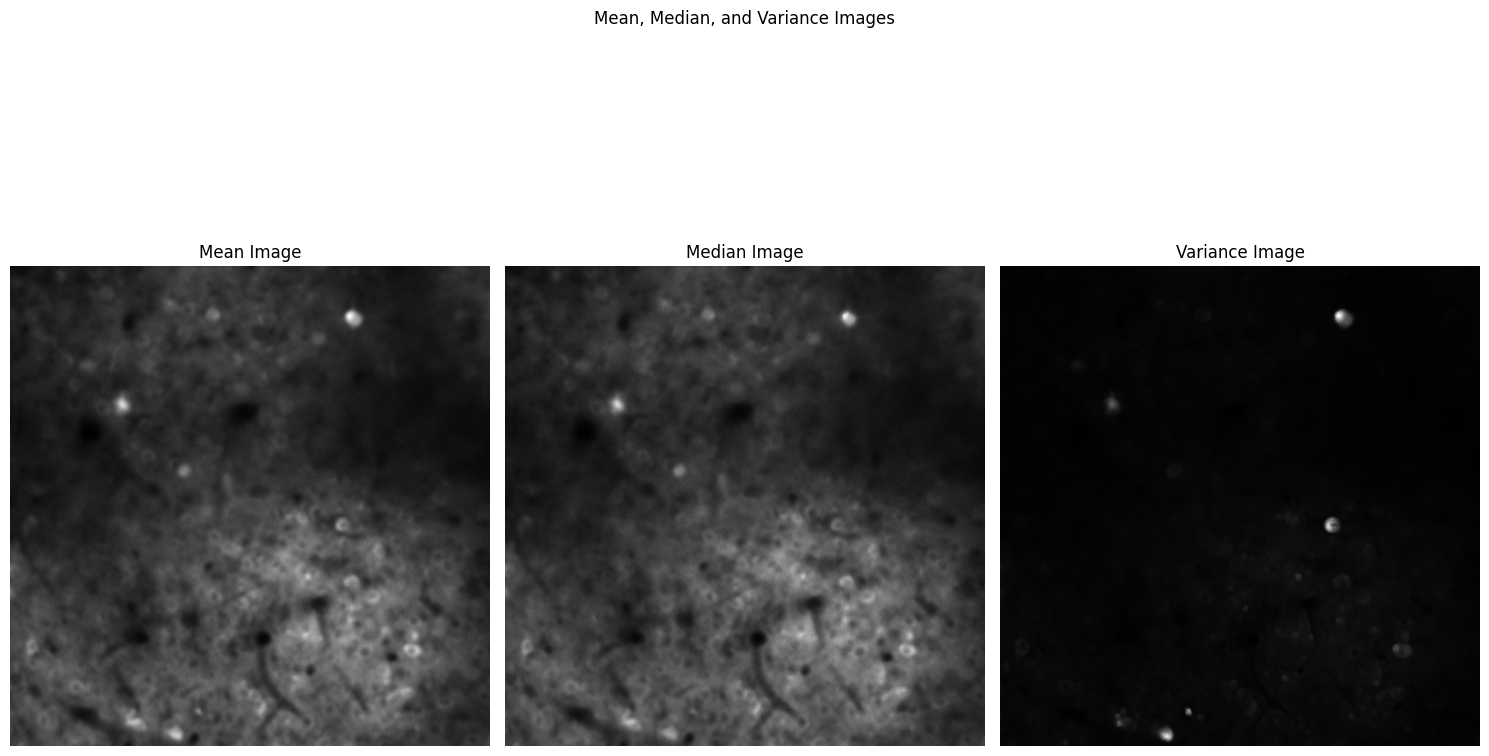

In [26]:
plot_mean_median_variance(movie)

### What do you notice about the visible cells in each of these?

The cells in the meand and median image cells look similar. This suggests that the median and mena pixel are near each other. In the variance image, no cells are visible. This suggests that after mean centering, the majority of the pixels were set to zero while only the intense pixels remained. 